## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [203]:
import pandas as pd
dataset = pd.read_csv("./Task1/titanic.csv")

headers = dataset.columns.tolist()

print(headers)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Я в цій лабі роблю дивні маніплюції з x та позиціями. Це тому що я не знав що можна було просто змінити розмір самого графіку. Переробляти пізно (насправді лінь), але вже з половини вже все не так заплутано.

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

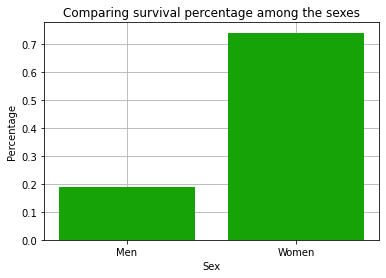

In [166]:
import matplotlib.pyplot as plt

m_count = len(dataset.loc[dataset['Sex'] == 'male', 'Name']) # count of men
w_count = len(dataset.loc[dataset['Sex'] == 'female', 'Name']) # count of women

pass_count = len(dataset) # count of passangers


m_survived = dataset.loc[(dataset['Sex'] == 'male'), 'Survived'].sum() # men survived
w_survived = dataset.loc[dataset['Sex'] == 'female', 'Survived'].sum() # women survived

m_died = m_count - m_survived # men died
w_died = w_count - w_survived # women died

survived = m_survived + w_survived # survived


w_percentage = w_survived / survived # percentage of the survived women
m_percentage = m_survived / survived # percentage of the survived men


pass_survived_percentage = survived / pass_count # % of survived passangers
pass_died_percentage = 1 - pass_survived_percentage # % of died passangers


plt.bar(['Men', 'Women'], # titles
        [m_survived/m_count, w_survived/w_count], # count of passangers
        color=[ '#16a307' , '#16a307'],
       zorder=3) # setting colors
plt.xlabel('Sex') # setting x label
plt.ylabel('Percentage') # setting y label
plt.title('Comparing survival percentage among the sexes') # title of the plot

plt.grid(zorder=0)
plt.show()

Віношення виживших пасажирів між статями.

Прокоментуйте побудовані графіки

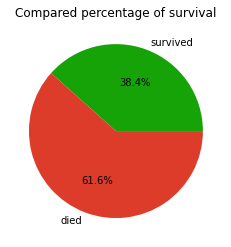

In [167]:
plt.pie([pass_survived_percentage, pass_died_percentage], # percentages of died and survived people from all passangers
        autopct='%1.1f%%', # specify format of the float displayed
        labels=['survived', 'died'],
        colors=['#16a307' , '#de3c2a']) # lables
plt.title('Compared percentage of survival')
plt.show()
# comparing percentage of survived people to the all the passangers

Віношення виживших та загинувших пасажиів.

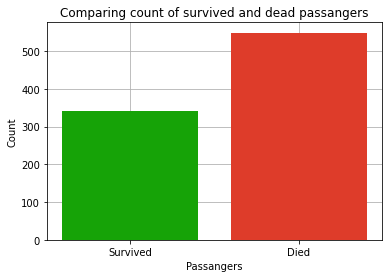

In [168]:
# create a bar graph
plt.bar(['Survived', 'Died'], # titles
        [survived, pass_count - survived], # count of passangers
        color=[ '#16a307' , '#de3c2a'],
       zorder=3) # setting colors
plt.xlabel('Passangers') # setting x label
plt.ylabel('Count') # setting y label
plt.title('Comparing count of survived and dead passangers') # title of the plot

plt.grid(zorder=0)
plt.show() 
# comparing the same on the previous plot, but his time y is count of people, not percentage

Кількість виживших та померших пасажирів.

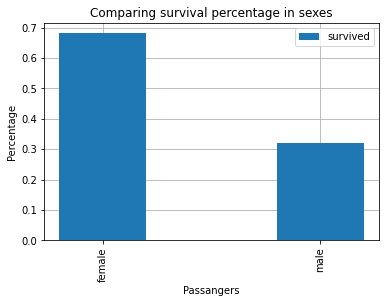

In [169]:
# create a bar graph
plt.bar(['female', 'male'], # titles
        [w_percentage, m_percentage], # percentage of survival
        width = 0.4, # making bars thinner
        label="survived",
       zorder=3)
plt.xlabel('Passangers') # setting x label
plt.ylabel('Percentage') # setting y label
plt.title('Comparing survival percentage in sexes') # title of the plot
plt.xticks(rotation='vertical') # rotating labels underneath the bars
plt.legend() # adding legend

plt.grid(zorder=0)
plt.show() 

# comparing percentage of survived people by sex

Відсоток виживших пасажирів залежно від статі. Кожен бар представляє 100% виживших для відповідної статі.

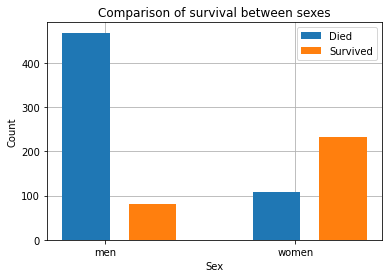

In [170]:
men_values = [m_died, m_survived] # how many men died and survived
women_values = [w_died, w_survived] # how many women died and survived
categories = ['men', 'women'] # category

bar_width = 0.25 # width of the plot bars
bar_offset = 0.1 # reduce distance between the values of the same category

fig, ax = plt.subplots() # extract figure and axies from the subplot object (i read it's good)

ax.bar([x - bar_offset for x in range(len(men_values))], # bring elements of the category closer
       men_values, # set the values of the first category
       width=bar_width,  # reduce width of the bars
       label='Died',
      zorder=3) # set legend to current category

ax.bar([x + bar_width for x in range(len(men_values))], # move elements of second category to the right
       women_values,  # set of values to second category
       width=bar_width, # reduce width of the bars
       label='Survived',
       zorder=3 ) # category legend

# plot title
ax.set_title('Comparison of survival between sexes')

# axies lables
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

# set sex labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

# add legend
ax.legend()
ax.grid(zorder=0)

plt.show()

as the result we get the plot where blue is dead people and orange - survived ones.
we can see compared amound of dead men and women, survived men and women
the interesting thing for me is that the compared size of died and survived in the currend sex to itself,
can be seen that men and women values are reversed. More men died than survived -> more women survived than died
and it's to such extremes that even though amound of men on the ship was higher, there still less survived men
than dead women

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [171]:
header = dataset.columns

not_missed = "" # list of columns without missed values
for column in header: 
    missing_values_count = dataset[column].isna().sum() # get the amound of missing values in the current column
    if missing_values_count == 0: # if there are no missing values add current column to the not missing ones
        not_missed += " " + column
    else:
        print("There are ", missing_values_count, " missed values in the ", column, ' column')
print("\nColumns not missing values: ", not_missed)

There are  177  missed values in the  Age  column
There are  687  missed values in the  Cabin  column
There are  2  missed values in the  Embarked  column

Columns not missing values:   PassengerId Survived Pclass Name Sex SibSp Parch Ticket Fare


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [172]:
w_names = dataset.loc[(dataset['Sex'] == 'female'), 'Name'] # get all the women's names
w_first_names = w_names.str.split(',').str[0] # extract first names
w_popular_name = w_first_names.value_counts().idxmax() # get the popular one
print(w_popular_name)

Andersson


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [173]:
m_names = dataset.loc[(dataset['Sex'] == 'male'), 'Name']
m_first_names = m_names.str.split(',').str[0]
m_popular_name = m_first_names.value_counts().idxmax()
print(m_popular_name)

Panula


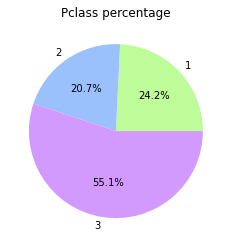

In [174]:
first_class_count = len(dataset.loc[dataset['Pclass'] == 1, 'Sex']) # count firt class passangers
second_class_count = len(dataset.loc[dataset['Pclass'] == 2, 'Sex']) # count firt class passangers
third_class_count = len(dataset.loc[dataset['Pclass'] == 3, 'Sex']) # count firt class passangers

class_count_array = [first_class_count, second_class_count, third_class_count]

first_class_percentage = first_class_count / pass_count
second_class_percentage = second_class_count / pass_count
third_class_percentage = third_class_count / pass_count

plt.pie(class_count_array,
       autopct='%1.1f%%',
        colors=["#befc9a", '#9ac1fc', '#d29afc'],
        labels=[1, 2, 3])

plt.title('Pclass percentage')
plt.show();

Відношення кількості пасажирів по класах. Все коло відображає 100% пасажирів.

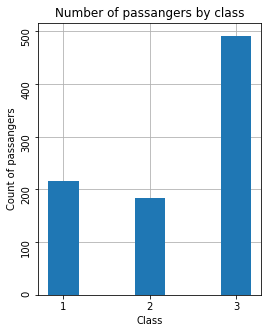

In [175]:
x = ['1', '2', '3']

plt.figure(figsize=(4, 5))

plt.bar(
    x,
    height = class_count_array,
    width = 0.35,
    zorder=3,
)
plt.xlabel('Class')
plt.ylabel('Count of passangers')
plt.yticks(rotation='vertical')
plt.grid(zorder=0)
plt.xticks(['1', '2', '3'])
plt. title('Number of passangers by class')

plt.show()

Кількість пасажирів по класах. Кожен бар відображає кількість пасажирів конкретного класу.

[136, 87, 119] [80, 97, 372]


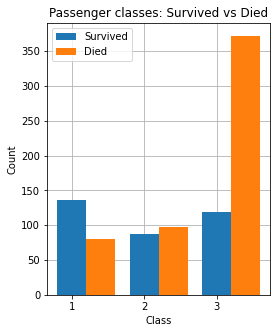

In [176]:
first_class = dataset.loc[dataset['Pclass'] == 1, ['Sex', 'Age', 'Survived']]
second_class = dataset.loc[dataset['Pclass'] == 2, ['Sex', 'Age', 'Survived']]
third_class = dataset.loc[dataset['Pclass'] == 3, ['Sex', 'Age', 'Survived']]

first_class_survived_count = first_class['Survived'].value_counts()[1]
second_class_survived_count = second_class['Survived'].value_counts()[1]
third_class_survived_count = third_class['Survived'].value_counts()[1]

fist_class_died_count = first_class['Survived'].value_counts()[0]
second_class_died_count = second_class['Survived'].value_counts()[0]
third_class_died_count = third_class['Survived'].value_counts()[0]

class_count_survived = [first_class_survived_count, second_class_survived_count, third_class_survived_count]
class_count_died = [fist_class_died_count, second_class_died_count, third_class_died_count]

bar_width = 0.4

class_categories = ['1', '2', '3']

plt.figure(figsize=(4, 5))

ax = plt.subplot()

ax.bar(class_categories,
        class_count_survived,
        width=bar_width,
       label="Survived",
       zorder = 3)

ax.bar([x + bar_width for x in range(len(class_count_died))],
      class_count_died,
      width=bar_width,
      label="Died",
      zorder=3)

ax.set_title('Passenger classes: Survived vs Died')

ax.set_xlabel('Class')
ax.set_ylabel('Count')

ax.set_xticks(range(len(class_categories)))
ax.set_xticklabels(class_categories)

ax.legend()
ax.grid(zorder=0)

print(class_count_survived, class_count_died)

plt.show()

Порівняння кількості виживших та загинувших пасажирів по класам і статі.

Прокоментуйте побудовані графіки

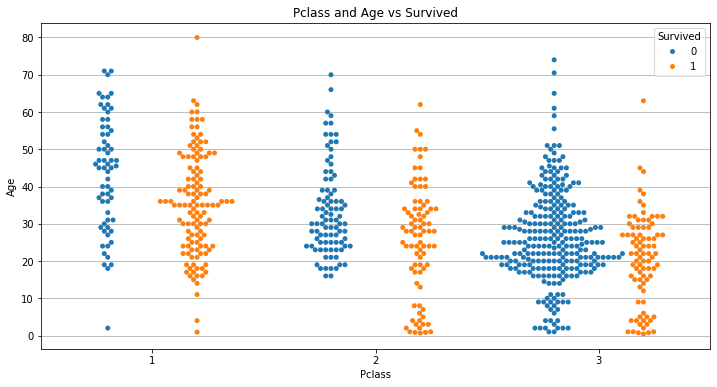

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.swarmplot(data=dataset, x='Pclass', y='Age', hue="Survived", dodge=True)

plt.grid(axis='y', linestyle='-')
plt.legend(title='Survived')
plt.title("Pclass and Age vs Survived")

plt.show()



Графік дозволяє нам візуально порівняти віковий розподіл тих, хто вижив, і тих, хто не вижив, у різних класах пасажирів.

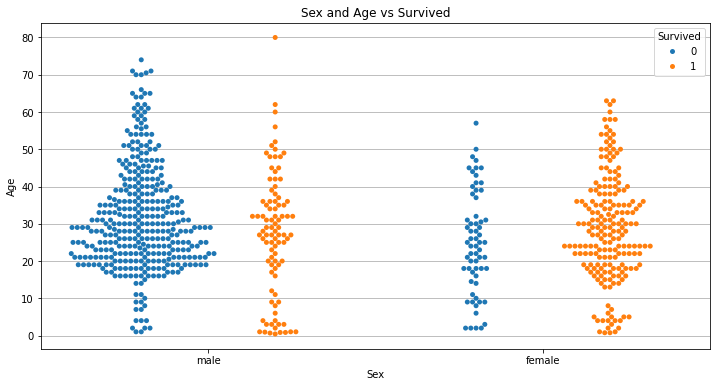

In [178]:
plt.figure(figsize=(12, 6))

sns.swarmplot(data=dataset, x='Sex', y='Age', hue="Survived", dodge=True)

plt.grid(axis='y', linestyle='-')
plt.legend(title='Survived')
plt.title('Sex and Age vs Survived')

plt.show()

Графік дозволяє нам візуально порівняти віковий розподіл тих, хто вижив, і тих, хто загинув, для чоловіків і жінок.

Прокоментуйте побудовані графіки

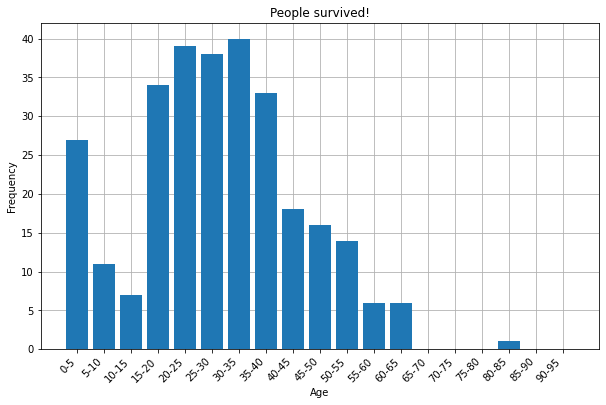

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

max_age = int(dataset['Age'].max())

survived_age_bins = pd.cut(dataset.loc[dataset['Survived'] == 1, 'Age'], bins=range(0, 100, 5), right=False)

bin_counts_survived = survived_age_bins.value_counts().sort_index()

x_data_survived = [str(bin.left) + '-' + str(bin.right) for bin in bin_counts_survived.index]

plt.figure(figsize=(10, 6))
plt.bar(x_data_survived, bin_counts_survived, zorder=3)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('People survived!')

plt.xticks(rotation=45, ha='right')
plt.grid(zorder=0)

plt.show()


Зоображення вікових категорій по 5 років пасажирів які вижили.

['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95']


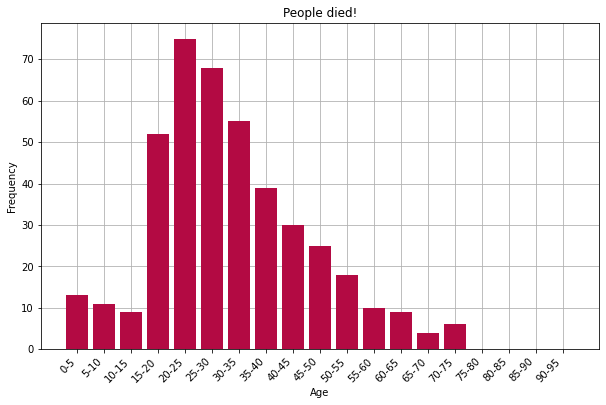

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

max_age = int(dataset['Age'].max())

died_age_bins = pd.cut(dataset.loc[dataset['Survived'] == 0, 'Age'], bins=range(0, 100, 5), right=False)

bin_counts_died = died_age_bins.value_counts().sort_index()

x_data_died = [str(bin.left) + '-' + str(bin.right) for bin in bin_counts_died.index]
print(x_data_died)
plt.figure(figsize=(10, 6))
plt.bar(x_data_died, bin_counts_died, zorder=3, color="#b30a43")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('People died!')

plt.xticks(rotation=45, ha='right')
plt.grid(zorder=0)

plt.show()

Зоображення вікових категорій по 5 років пасажирів які померли.

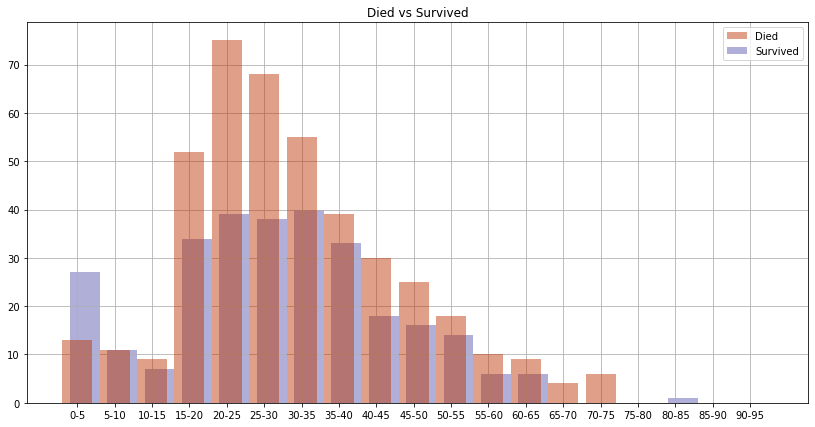

In [204]:
# x_data_survived = [str(bin.left) + '-' + str(bin.right) for bin in bin_counts.index]
# x_data_died = [str(bin.left) + '-' + str(bin.right) for bin in bin_counts.index]

offset = 0.2

plt.figure(figsize=(14, 7))

plt.bar(x_data_survived, bin_counts_died, zorder=3, color="#b307", label='Died')
plt.bar([x + offset for x in range(len(bin_counts_survived))], bin_counts_survived, color="#55a7", label='Survived')

plt.legend()
plt.title("Died vs Survived")
plt.grid()

plt.show()

Порівняння вікових категорій по 5 років пасажирів які вижили та загинули.

У графіку з вижившими не видно ніякого розподілу, хоча з іншим віковим діапазоном для кожної групи, графік міг би бути злегка схожим на нормальний розподіл, правда сказати що це нормальний розподіл не можна було б.
У випадку з загинувшими інша ситуація, чітко видно спад кількості загинувших починаючи з проміжку 20-25.

Я вважаю що побудованих графіків достатньо для висновків щодо розподілів, але достатньо для статистичних оцінок.

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


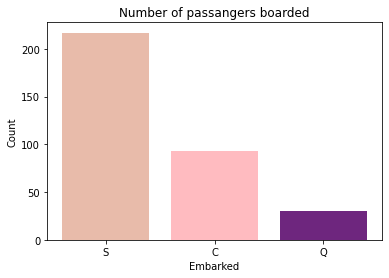

In [218]:
embarked_S = dataset.loc[(dataset['Embarked'] == 'S'), ['Survived', 'Sex', 'Pclass']]
embarked_C = dataset.loc[(dataset['Embarked'] == 'C'), ['Survived', 'Sex', 'Pclass']]
embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q'), ['Survived', 'Sex', 'Pclass']]

survived_embarked_S = dataset.loc[(dataset['Embarked'] == 'S') & (dataset['Survived'] == 1), ['Survived', 'Sex', 'Pclass']]


plt.figure(figsize=(6, 4))
embarked_array_count = [embarked_S.sum(), embarked_C.sum(), embarked_Q.sum()]
colors = ['#b305', '#f345', '#6e267e']

plt.bar(['S', 'C', 'Q'], embarked_array, color=colors)

plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Number of passangers boarded")
plt.show()

Кількість людей які бортувались в різних портах.

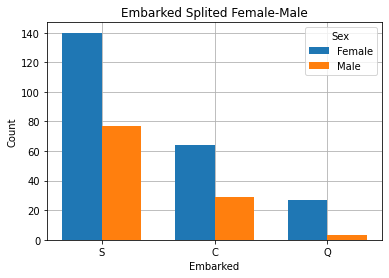

In [224]:
import matplotlib.pyplot as plt

female_embarked_S = dataset.loc[(dataset['Embarked'] == 'S') & (dataset['Sex'] == 'female'), 'Survived'].sum()
female_embarked_C = dataset.loc[(dataset['Embarked'] == 'C') & (dataset['Sex'] == 'female'), 'Survived'].sum()
female_embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q') & (dataset['Sex'] == 'female'), 'Survived'].sum()

male_embarked_S = dataset.loc[(dataset['Embarked'] == 'S') & (dataset['Sex'] == 'male'), 'Survived'].sum()
male_embarked_C = dataset.loc[(dataset['Embarked'] == 'C') & (dataset['Sex'] == 'male'), 'Survived'].sum()
male_embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q') & (dataset['Sex'] == 'male'), 'Survived'].sum()

female_counts = [female_embarked_S, female_embarked_C, female_embarked_Q]
male_counts = [male_embarked_S, male_embarked_C, male_embarked_Q]

bar_width = 0.35

x_female = range(len(female_counts))
x_male = [x + bar_width for x in x_female]

plt.bar(x_female, female_counts, width=bar_width, label='Female', zorder=3)
plt.bar(x_male, male_counts, width=bar_width, label='Male', zorder=3)

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked Splited Female-Male')
plt.xticks([x + bar_width / 2 for x in x_female], ['S', 'C', 'Q'])

plt.legend(title="Sex")
plt.grid()

plt.show()


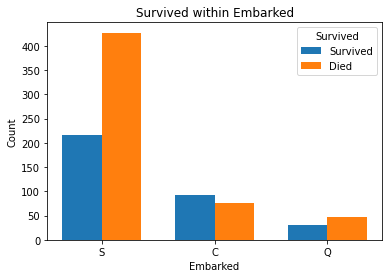

In [232]:
import matplotlib.pyplot as plt

survived_embarked_S = dataset.loc[(dataset['Embarked'] == 'S'), 'Survived'].value_counts()
survived_embarked_C = dataset.loc[(dataset['Embarked'] == 'C'), 'Survived'].value_counts()
survived_embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q'), 'Survived'].value_counts()

survived_counts = [survived_embarked_S[1], survived_embarked_C[1], survived_embarked_Q[1]]
not_survived_counts = [survived_embarked_S[0], survived_embarked_C[0], survived_embarked_Q[0]]

bar_width = 0.35

x_survived = range(len(survived_counts))
x_not_survived = [x + bar_width for x in x_survived]

plt.bar(x_survived, survived_counts, width=bar_width, label='Survived')
plt.bar(x_not_survived, not_survived_counts, width=bar_width, label='Died')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survived within Embarked')
plt.xticks([x + bar_width / 2 for x in x_survived], ['S', 'C', 'Q'])

plt.legend(title='Survived')

plt.show()


Скільки вижило та загинуло пасажирів які сіли в портах.

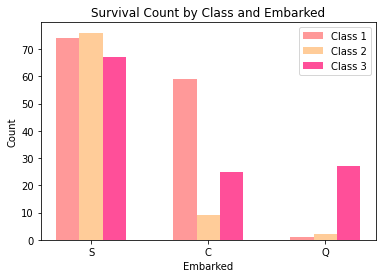

In [237]:
import matplotlib.pyplot as plt

colors = ['#ff9999', '#ffcc99', '#ff4f99']

class_1_embarked_S = dataset.loc[(dataset['Embarked'] == 'S') & (dataset['Pclass'] == 1), 'Survived'].value_counts()
class_2_embarked_S = dataset.loc[(dataset['Embarked'] == 'S') & (dataset['Pclass'] == 2), 'Survived'].value_counts()
class_3_embarked_S = dataset.loc[(dataset['Embarked'] == 'S') & (dataset['Pclass'] == 3), 'Survived'].value_counts()

class_1_embarked_C = dataset.loc[(dataset['Embarked'] == 'C') & (dataset['Pclass'] == 1), 'Survived'].value_counts()
class_2_embarked_C = dataset.loc[(dataset['Embarked'] == 'C') & (dataset['Pclass'] == 2), 'Survived'].value_counts()
class_3_embarked_C = dataset.loc[(dataset['Embarked'] == 'C') & (dataset['Pclass'] == 3), 'Survived'].value_counts()

class_1_embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q') & (dataset['Pclass'] == 1), 'Survived'].value_counts()
class_2_embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q') & (dataset['Pclass'] == 2), 'Survived'].value_counts()
class_3_embarked_Q = dataset.loc[(dataset['Embarked'] == 'Q') & (dataset['Pclass'] == 3), 'Survived'].value_counts()

class_1_counts = [class_1_embarked_S[1], class_1_embarked_C[1], class_1_embarked_Q[1]]
class_2_counts = [class_2_embarked_S[1], class_2_embarked_C[1], class_2_embarked_Q[1]]
class_3_counts = [class_3_embarked_S[1], class_3_embarked_C[1], class_3_embarked_Q[1]]

bar_width = 0.2

x_class_1 = range(len(class_1_counts))
x_class_2 = [x + bar_width for x in x_class_1]
x_class_3 = [x + bar_width * 2 for x in x_class_1]

plt.bar(x_class_1, class_1_counts, width=bar_width, label='Class 1', color=colors[0])
plt.bar(x_class_2, class_2_counts, width=bar_width, label='Class 2', color=colors[1])
plt.bar(x_class_3, class_3_counts, width=bar_width, label='Class 3', color=colors[2])


plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival сount by Class and Embarked')
plt.xticks([x + bar_width for x in x_class_1], ['S', 'C', 'Q'])

plt.legend()

plt.show()


Кількість виживших пасажирів по класу та порту посадки.

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

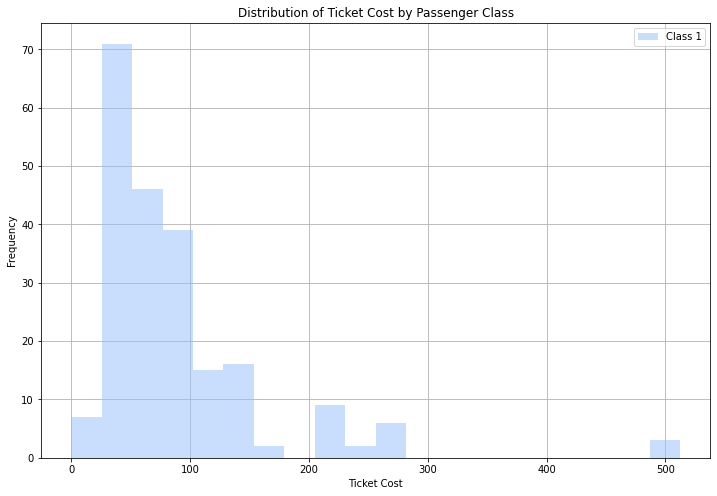

In [251]:
plt.figure(figsize=(12,8))

class_1_fares = dataset.loc[dataset['Pclass'] == 1, 'Fare']
class_2_fares = dataset.loc[dataset['Pclass'] == 2, 'Fare']
class_3_fares = dataset.loc[dataset['Pclass'] == 3, 'Fare']

plt.hist(class_1_fares, bins=20, alpha=0.5, label='Class 1', zorder=3, color="#95bdfc")

plt.xlabel('Ticket Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Cost by Passenger Class')
plt.legend()
plt.grid()

plt.show()



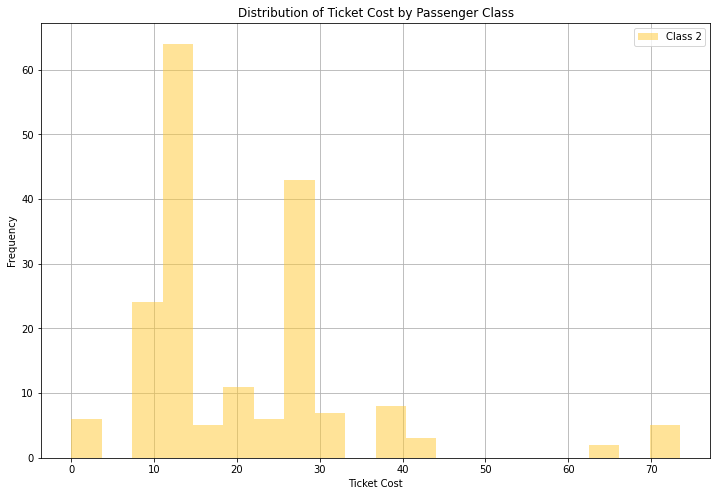

In [256]:
plt.figure(figsize=(12,8))

plt.hist(class_2_fares, bins=20, alpha=0.5, label='Class 2', zorder=3, color="#ffc933")

plt.xlabel('Ticket Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Cost by Passenger Class')
plt.legend()
plt.grid()

plt.show()

ціна та кількість квитків в другому класі.

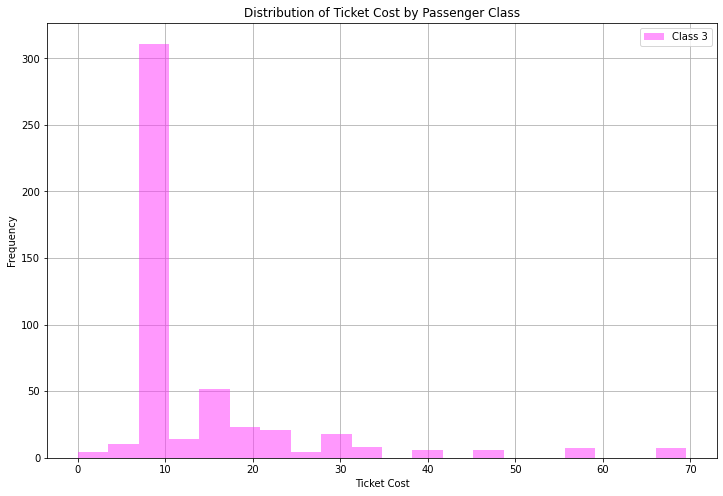

In [257]:
plt.figure(figsize=(12,8))
plt.hist(class_3_fares, bins=20, alpha=0.5, label='Class 3', zorder=3, color="#ff33fc")

plt.xlabel('Ticket Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Cost by Passenger Class')
plt.legend()
plt.grid()

plt.show()

ціна та кількість квитків в третьому класі.

Прокоментуйте побудовані графіки